In [1]:
import os
import numpy as np
import xarray as xr
import numpy.testing as npt
import matplotlib.pyplot as plt

In [2]:
from gridmet_bmi import BmiGridmet
os.getcwd()

'/home/rmcd/git/gridmet_bmi/notebooks'

In [3]:
x = BmiGridmet()
x.initialize('../examples/gridmet_bmi.yaml')

../examples/gridmet_bmi.yaml
...



In [4]:
print(x.get_component_name())

Gridmet_BMI


In [5]:
print(x.get_input_var_names())
print(x.get_output_var_names())



('daily_maximum_temperature', 'daily_minimum_temperature', 'precipitation_amount')


In [6]:
grid_id = x.get_var_grid('daily_maximum_temperature')
size = x.get_grid_size(grid_id)
bmivals = np.empty(size)
shape = np.empty(2, dtype=np.int)
x.get_grid_shape(grid_id, shape)
x.get_value('daily_maximum_temperature', bmivals)
origin = np.empty(2, dtype=np.float)
delta = np.empty(2, dtype=np.float)
x.get_grid_origin(grid_id, origin)
x.get_grid_spacing(grid_id, delta)
print(origin, delta)
x.get_current_time()

[  25.06666667 -124.76666663] [0.04166667 0.04166667]


0.0

In [7]:
hruid = 'nhru_v11' # for GFv11_v2e
uofi_file = '../examples/agg_met_tmmx_20200101_20200107.nc'
ds = xr.open_dataset(uofi_file)
print(ds, flush=True)
#Read NHM hru shapefiles into geopandas dataframe
print(os.getcwd(), flush=True)

<xarray.Dataset>
Dimensions:                    (day: 7, lat: 585, lon: 1386)
Coordinates:
  * day                        (day) datetime64[ns] 2020-01-01 ... 2020-01-07
  * lat                        (lat) float64 49.4 49.36 49.32 ... 25.11 25.07
  * lon                        (lon) float64 -124.8 -124.7 ... -67.1 -67.06
Data variables:
    daily_maximum_temperature  (day, lat, lon) float32 ...
Attributes:
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.0
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.400000000000006
    geospatial_lon_min:         -124.76666663333334
    geospatial_lon_max:         -67.05833330000002
    geospatial_lon_resolution:  0.041666666666666
    geospatial_lat_resolution:  0.041666666666666
    geospatial_lat_units:       decimal_degrees north
    geospatial_lon_units:       decimal_degrees east
    coordinate_s

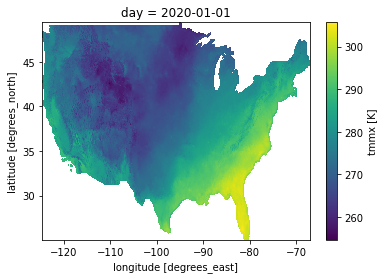

In [8]:
temp = ds.daily_maximum_temperature
temp1 = temp.isel(day=0)
temp1.plot()

In [9]:
rawvals = temp1.values

In [10]:
print(f'rawvalues shape {rawvals.shape}')
print(f'bmivalues shape {bmivals.shape}')
bmivals_reshape = np.reshape(bmivals, shape)
print(f'bmivalues reshape {bmivals_reshape.shape}')

rawvalues shape (585, 1386)
bmivalues shape (810810,)
bmivalues reshape (585, 1386)


In [13]:
npt.assert_equal(np.flipud(rawvals), bmivals_reshape)

In [14]:
lon, lat = np.meshgrid(ds['lon'], ds['lat'])

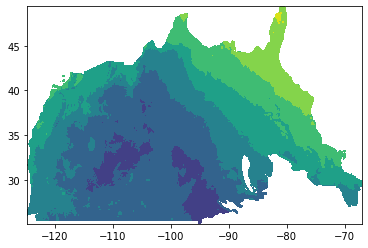

In [15]:
plt.contourf(ds['lon'],ds['lat'], bmivals_reshape)

In [16]:
 
newlat = np.empty(bmivals_reshape.shape[0], dtype=np.float)
newlon = np.empty(bmivals_reshape.shape[1], dtype=np.float)
   

In [24]:
print(delta, origin)

for index, val in np.ndenumerate(newlat):
    newlat[index[0]] = origin[0] + (index[0]*delta[0])
    
for index, val in np.ndenumerate(newlon):
    newlon[index[0]] = origin[1] + (index[0]*delta[1])
    
print(newlat.shape, newlon.shape)
print(np.min(newlat), np.max(newlat))
print(np.min(newlon), np.max(newlon))

[0.04166667 0.04166667] [  25.06666667 -124.76666663]
(585,) (1386,)
25.066666666666666 49.39999999999961
-124.76666663333334 -67.05833330000094


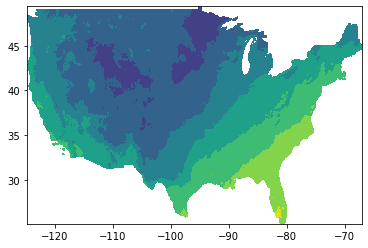

In [28]:
plt.contourf(newlon, newlat, np.flipud(bmivals_reshape))